<img src='Task-5.png'>

### Overview

This exploratory data analysis (EDA) is conducted on a road accident dataset to uncover insights into the factors affecting the severity and frequency of accidents. The dataset includes information on various attributes, such as the time of the accident, the driver's characteristics (age, sex, education), vehicle details, road conditions, and the severity of the accident. By analyzing these features, we aim to identify trends, patterns, and relationships that could inform safety measures, accident prevention strategies, and policy decisions.

### Objective

The primary objectives of this EDA are:

- **Understand the distribution of accidents**: Investigate the frequency of accidents across different days of the week, times of day, and conditions (e.g., weather, road type).

- **Examine the relationship between driver characteristics and accident severity**: Analyze how factors like age, sex, educational level, and driving experience influence the severity of accidents.

- **Explore the impact of road conditions and accident types**: Identify how road surface, alignment, and junction types correlate with accident outcomes.

- **Identify patterns in casualties**: Investigate the relationship between the number of casualties, casualty severity, and accident severity.

- **Missing data analysis**: Identify patterns of missing data to determine if data imputation or further cleaning is required.

### Methodology:

1. **Data Cleaning and Preprocessing**:

- Handling missing values using imputation strategies (e.g., mode for categorical features and median for numerical features).
- Identifying outliers and dealing with them, especially in numerical columns.


2. **Visual Analysis**:

- **Frequency Distributions**: Using countplots and bar charts to visualize the distribution of categorical variables such as Day_of_week, Driving_experience, Sex_of_driver, Accident_severity, etc.
- **Central Tendency for Numerical Data**: Calculating and visualizing key statistics (mean, median) for numerical columns like Number_of_vehicles_involved and Number_of_casualties.
- Creating heatmaps, boxplots, pairplots, and countplots for different columns to visualize relationships and distributions.
Using color palettes (e.g., coolwarm, Set1, twilight) to enhance the clarity and aesthetics of visualizations.
- **Time-based Analysis**:  analyzing how time (hour of the day, day of the week) affects accident severity or frequency.


3. **Summarizing** 

- Summarizing the key findings from the analysis, such as identifying high-risk factors (e.g., certain weather conditions or time of day that correlate with severe accidents).
- Proposing recommendations or insights based on the data to inform policy or further analysis.

### About Dataset

This data set is collected from Addis Ababa Sub city police departments for  research work.

link to dataset : https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents/code



### Content


The data set has been prepared from manual records of road traffic accident of the year 2017-20. All the sensitive information have been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms .

#


In [217]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# Set the color palette
sns.set(style="whitegrid", palette="muted")

In [218]:
# loading and reading the dataset
df = pd.read_csv('RTA Dataset.csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [219]:
df.shape

(12316, 32)

### Data Preprocessing

In [220]:
#checking nulls

columns_with_nulls = df.isna().sum()[df.isna().sum()>0]
columns_with_nulls 


Educational_level           741
Vehicle_driver_relation     579
Driving_experience          829
Type_of_vehicle             950
Owner_of_vehicle            482
Service_year_of_vehicle    3928
Defect_of_vehicle          4427
Area_accident_occured       239
Lanes_or_Medians            385
Road_allignment             142
Types_of_Junction           887
Road_surface_type           172
Type_of_collision           155
Vehicle_movement            308
Work_of_casuality          3198
Fitness_of_casuality       2635
dtype: int64

In [221]:
#checking nulls percentage
columns_with_nulls_percent = (columns_with_nulls / df.shape[0]) * 100
columns_with_nulls_percent 

Educational_level           6.016564
Vehicle_driver_relation     4.701202
Driving_experience          6.731082
Type_of_vehicle             7.713543
Owner_of_vehicle            3.913608
Service_year_of_vehicle    31.893472
Defect_of_vehicle          35.945112
Area_accident_occured       1.940565
Lanes_or_Medians            3.126015
Road_allignment             1.152972
Types_of_Junction           7.202014
Road_surface_type           1.396557
Type_of_collision           1.258525
Vehicle_movement            2.500812
Work_of_casuality          25.966223
Fitness_of_casuality       21.394933
dtype: float64

In [222]:
# lets remove those columns with more than 20 % nulls
columns_with_nulls_percent_20 = columns_with_nulls_percent[columns_with_nulls_percent > 20].index
columns_with_nulls_percent_20 

Index(['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality',
       'Fitness_of_casuality'],
      dtype='object')

In [223]:
df.drop(columns_with_nulls_percent_20,axis=1,inplace=True)

In [224]:
df.shape

(12316, 28)

In [225]:
# lets check out the remaining columns
remaining_nulls = (df.isna().sum()[df.isna().sum()>0] / df.shape[0]) * 100
remaining_nulls

Educational_level          6.016564
Vehicle_driver_relation    4.701202
Driving_experience         6.731082
Type_of_vehicle            7.713543
Owner_of_vehicle           3.913608
Area_accident_occured      1.940565
Lanes_or_Medians           3.126015
Road_allignment            1.152972
Types_of_Junction          7.202014
Road_surface_type          1.396557
Type_of_collision          1.258525
Vehicle_movement           2.500812
dtype: float64

In [226]:
# We will use imputation techniques for numerical columns we will impute with median values and for textutal we will use mode 

df[remaining_nulls.index].head()

,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Type_of_collision,Vehicle_movement
0,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Collision with roadside-parked vehicles,Going straight
1,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Vehicle with vehicle collision,Going straight
2,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,NaN,No junction,Asphalt roads,Collision with roadside objects,Going straight
3,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Vehicle with vehicle collision,Going straight
4,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Vehicle with vehicle collision,Going straight


In [227]:
df["Educational_level"].value_counts()

Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64

In [228]:
# lets remove the rows with unknown from educational_level and use its mode to impute missing values.

df = df[~(df["Educational_level"] == 'Unknown')]

In [229]:
df["Educational_level"].value_counts()

Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Illiterate              45
Name: count, dtype: int64

In [230]:
mode_df_Educational_level = df["Educational_level"].mode().values[0]
mode_df_Educational_level

'Junior high school'

In [231]:
df['Educational_level'] = df['Educational_level'].fillna(mode_df_Educational_level)

In [232]:
remaining_nulls = df.isna().sum()[df.isna().sum()>0]
remaining_nulls

Vehicle_driver_relation    579
Driving_experience         817
Type_of_vehicle            941
Owner_of_vehicle           479
Area_accident_occured      238
Lanes_or_Medians           376
Road_allignment            140
Types_of_Junction          880
Road_surface_type          171
Type_of_collision          153
Vehicle_movement           306
dtype: int64

In [233]:
# lets remove unknown  

df = df[~(df["Vehicle_driver_relation"] == 'Unknown')]

In [234]:
mode_Vehicle_driver_relation = df["Vehicle_driver_relation"].mode().values[0]
mode_Vehicle_driver_relation

'Employee'

In [235]:
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].fillna(mode_Vehicle_driver_relation)

In [236]:
remaining_nulls = df.isna().sum()[df.isna().sum()>0]
remaining_nulls


Driving_experience       806
Type_of_vehicle          932
Owner_of_vehicle         472
Area_accident_occured    236
Lanes_or_Medians         372
Road_allignment          138
Types_of_Junction        880
Road_surface_type        170
Type_of_collision        153
Vehicle_movement         306
dtype: int64

In [237]:
df = df[~(df["Driving_experience"] == 'unknown')]

In [238]:

numeric_cols = df[remaining_nulls.index].select_dtypes(include=['number']).columns
non_numeric_cols = df[remaining_nulls.index].select_dtypes(exclude=['number']).columns


# For numeric columns, fill missing values with the median
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

# For non-numeric columns, fill missing values with the mode
df[non_numeric_cols] = df[non_numeric_cols].apply(lambda x: x.fillna(x.mode()[0]))



In [239]:
#  Verify missing values have been imputed
print(df.isna().sum()[df.isna().sum()>0])


Series([], dtype: int64)


In [240]:
# lets check for duplicates 

df[df.duplicated()]

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity


In [241]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

### Data Visualisations and finings patterns in accident data

In [242]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns

['Number_of_vehicles_involved', 'Number_of_casualties']

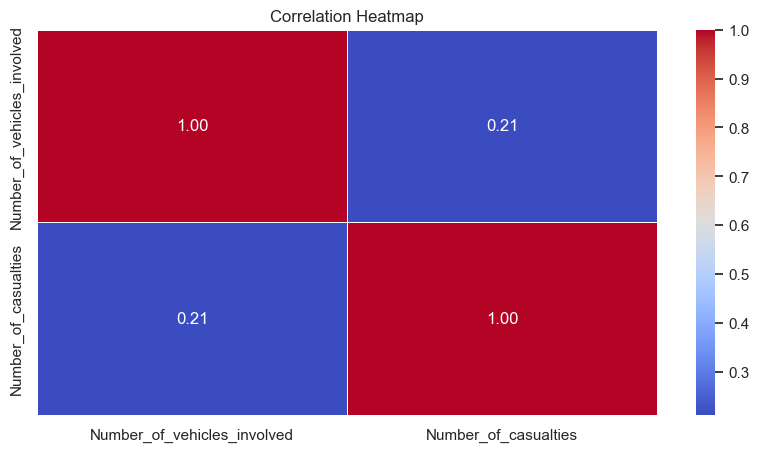

In [243]:
# Correlation heatmap for numerical columns
corr = df[numerical_columns].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Observations 
- The correlation heatmap shows a weak positive relationship between the number of vehicles involved and the number of casualties. This suggests that as the number of vehicles increases, there is a slight tendency for the number of casualties to increase.  


In [244]:
df = df[~(df['Age_band_of_driver'] == 'Unkown')]

In [245]:
df['Casualty_severity'].value_counts()

Casualty_severity
3     6987
na    4394
2      762
1       26
Name: count, dtype: int64

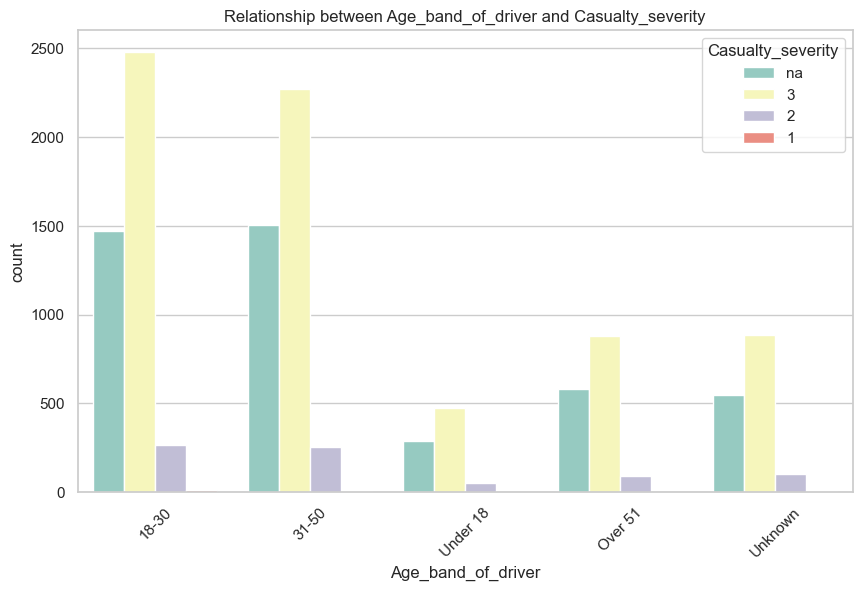

In [246]:
# Relationship between Age_band_of_driver and Casualty_severity
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_band_of_driver', hue='Casualty_severity', data=df, palette="Set3")
plt.title("Relationship between Age_band_of_driver and Casualty_severity")
plt.xticks(rotation=45)
plt.show()

### Observations 
- The bar chart shows the distribution of casualty severity across different age bands of drivers. The highest number of casualties with severity level 3 is observed in the 18-30 age group. There is a significant decrease in casualties with increasing age, with the lowest number occurring in the "Over 51" age group 


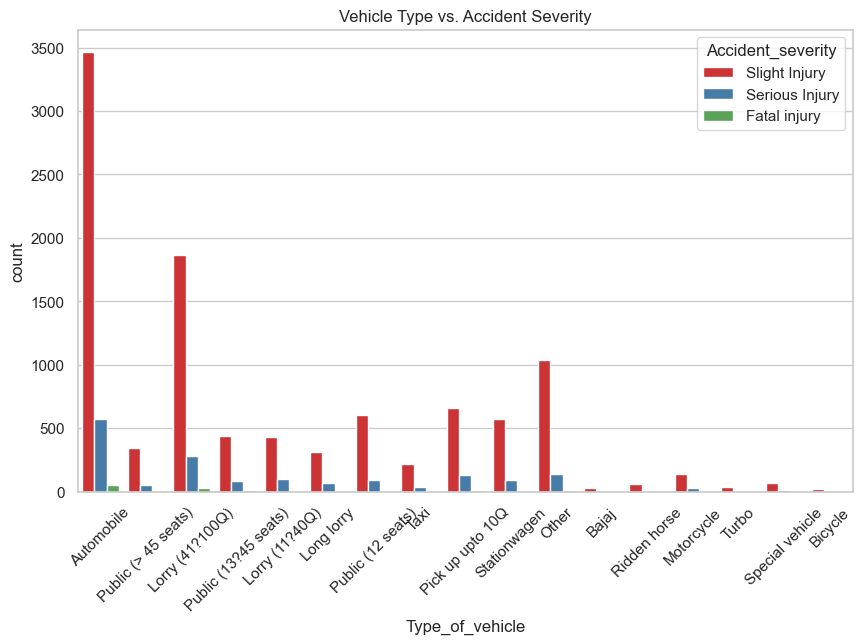

In [247]:
# Relationship between Type_of_vehicle and Accident_severity
plt.figure(figsize=(10, 6))
sns.countplot(x='Type_of_vehicle', hue='Accident_severity', data=df, palette="Set1")
plt.title("Vehicle Type vs. Accident Severity")
plt.xticks(rotation=45)
plt.show()

### Observations 
- The bar chart shows the distribution of accident severity across different vehicle types. Automobiles have the highest number of accidents, with a majority resulting in slight injuries. Motorcycles have the highest proportion of fatal accidents, followed by automobiles. Public transport vehicles generally have lower accident numbers compared to other vehicle types.

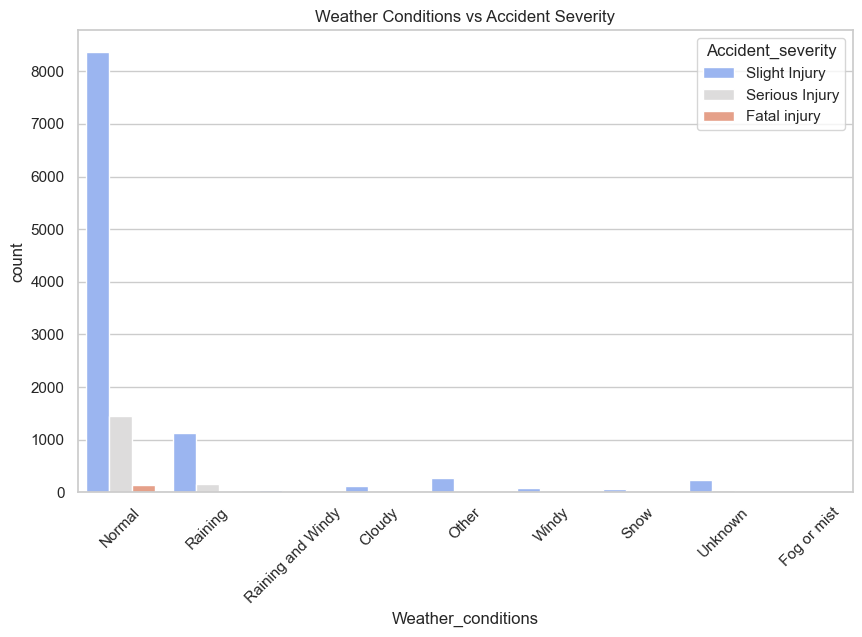

In [248]:
# Weather conditions vs Accident Severity
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_conditions', hue='Accident_severity', data=df, palette="coolwarm")
plt.title("Weather Conditions vs Accident Severity")
plt.xticks(rotation=45)
plt.show()

### Observations
- The bar chart shows the distribution of accident severity across different weather conditions. Normal weather conditions have the highest number of accidents, with a majority resulting in slight injuries. Fog or mist has the highest proportion of fatal accidents, followed by raining and windy conditions. Snow and windy conditions have the lowest number of accidents.


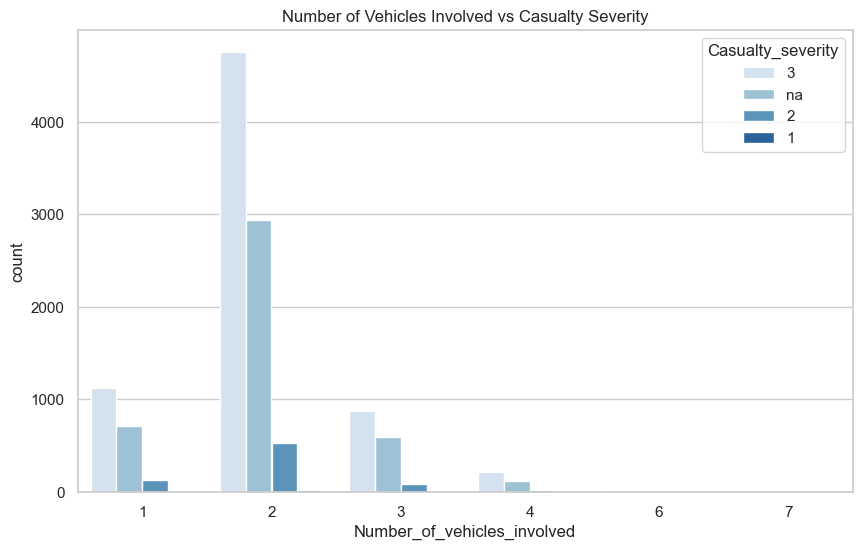

In [249]:
# Number of vehicles involved vs Casualty severity
plt.figure(figsize=(10, 6))
sns.countplot(x='Number_of_vehicles_involved', hue='Casualty_severity', data=df, palette="Blues")
plt.title("Number of Vehicles Involved vs Casualty Severity")
plt.show()

### Observations
- The bar chart shows the distribution of casualty severity across different numbers of vehicles involved in accidents. The highest number of accidents with severity level 3 is observed when 2 vehicles are involved. There is a significant decrease in casualties with increasing number of vehicles, with the lowest number occurring with 7 vehicles involved.

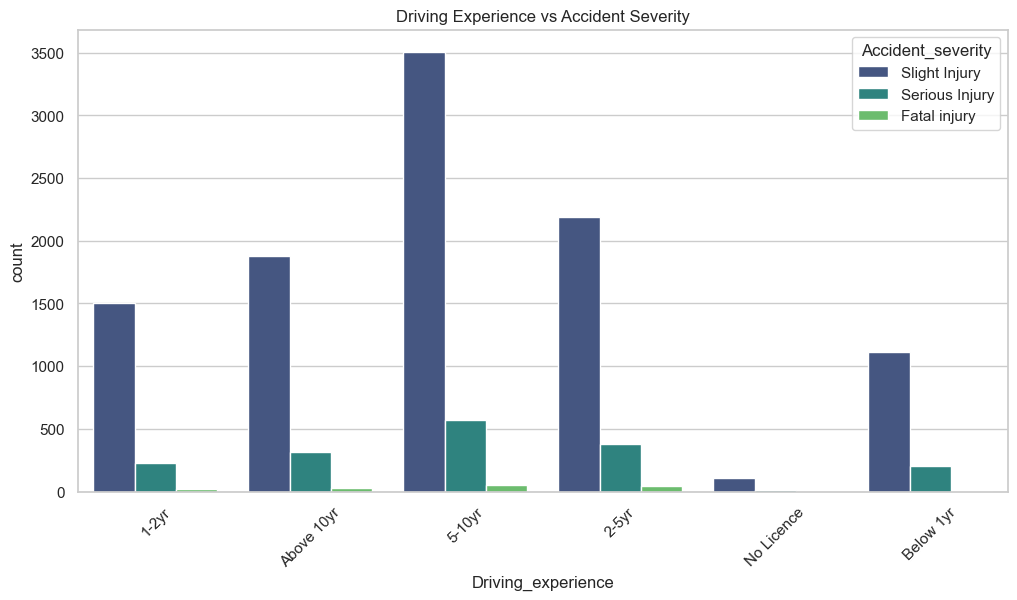

In [250]:
# Relationship between 'Driving_experience' and 'Accident_severity'
plt.figure(figsize=(12, 6))
sns.countplot(x='Driving_experience', hue='Accident_severity', data=df, palette="viridis")
plt.title("Driving Experience vs Accident Severity")
plt.xticks(rotation=45)
plt.show()

### Observations
- The bar chart shows the distribution of accident severity across different driving experience levels. Drivers with 5-10 years of experience have the highest number of accidents, with a majority resulting in slight injuries. Drivers with below 1 year of experience have the lowest number of accidents.

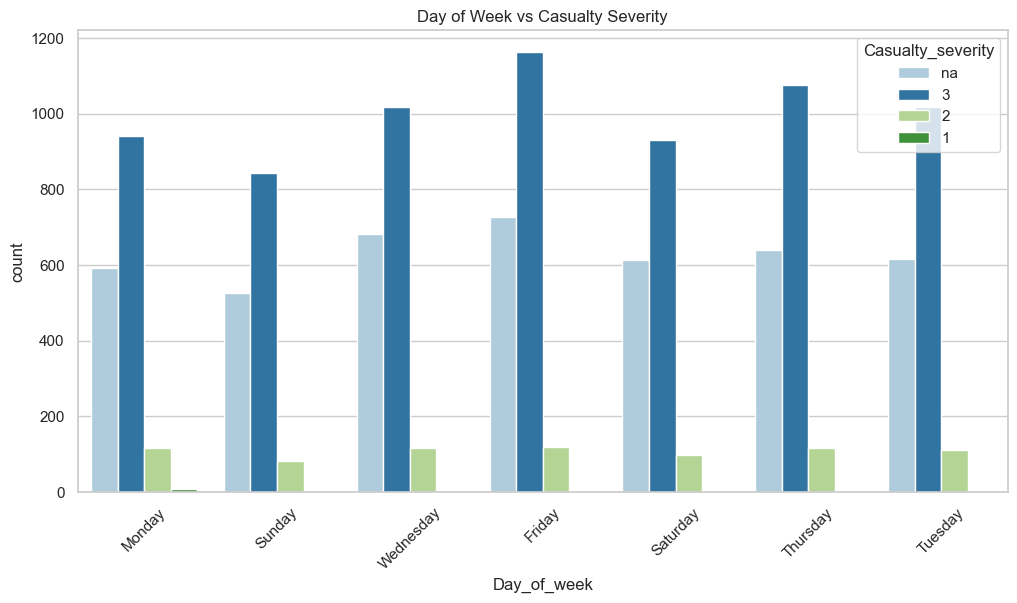

In [252]:
# Relationship between Day_of_week and Casualty_severity
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_week', hue='Casualty_severity', data=df, palette="Paired")
plt.title("Day of Week vs Casualty Severity")
plt.xticks(rotation=45)
plt.show()

### Observations
- The bar chart shows the distribution of casualty severity across different days of the week. Friday has the highest number of accidents, with a majority resulting in severity level 3. Monday has the lowest number of accidents. There is a slight decrease in casualties towards the end of the week.


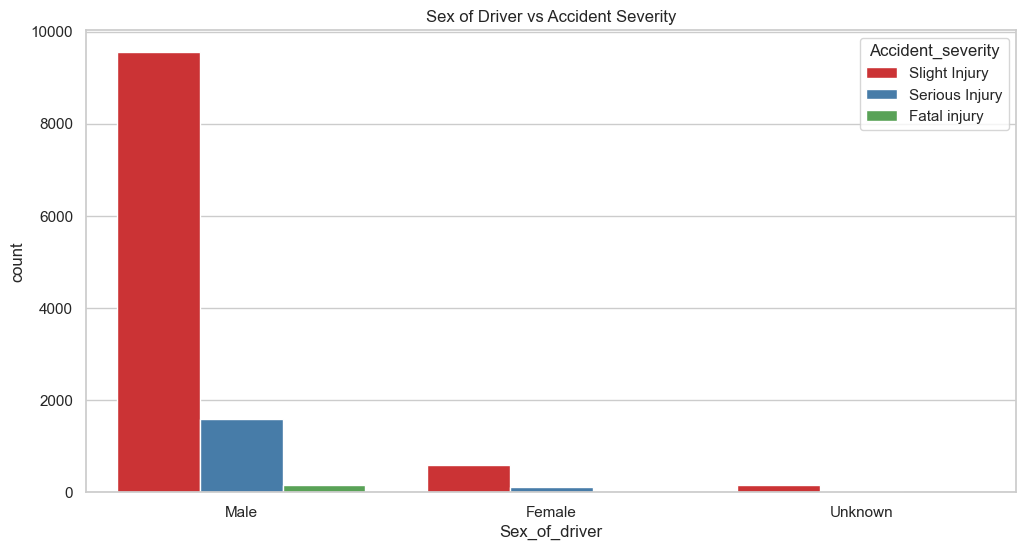

In [253]:
# Relationship between Sex_of_driver and Accident_severity
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex_of_driver', hue='Accident_severity', data=df, palette="Set1")
plt.title("Sex of Driver vs Accident Severity")
plt.show()

### Observations
- The bar chart shows the distribution of accident severity across different sexes of drivers. Male drivers have the highest number of accidents, with a majority resulting in slight injuries. Female drivers have the lowest number of accidents. Unknown sex has the highest proportion of fatal accidents.

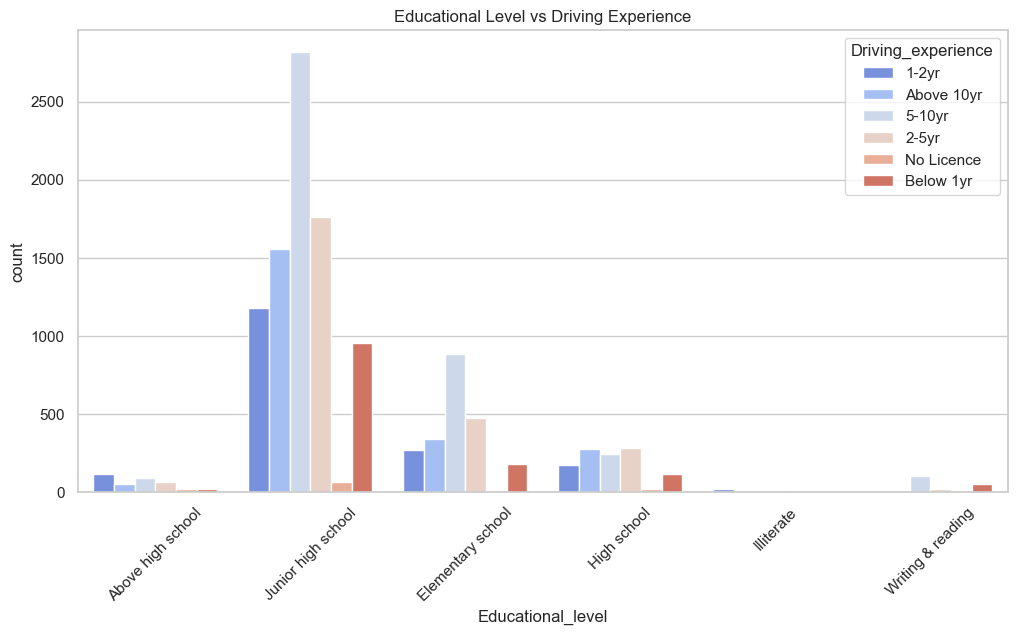

In [254]:
# Relationship between Educational_level and Driving_experience
plt.figure(figsize=(12, 6))
sns.countplot(x='Educational_level', hue='Driving_experience', data=df, palette="coolwarm")
plt.title("Educational Level vs Driving Experience")
plt.xticks(rotation=45)
plt.show()

### Observations 

-  The bar chart shows the distribution of driving experience across different educational levels. People with Junior high school education level  have the highest number of drivers with 5-10 years of experience. There are very few Illiterate drivers.

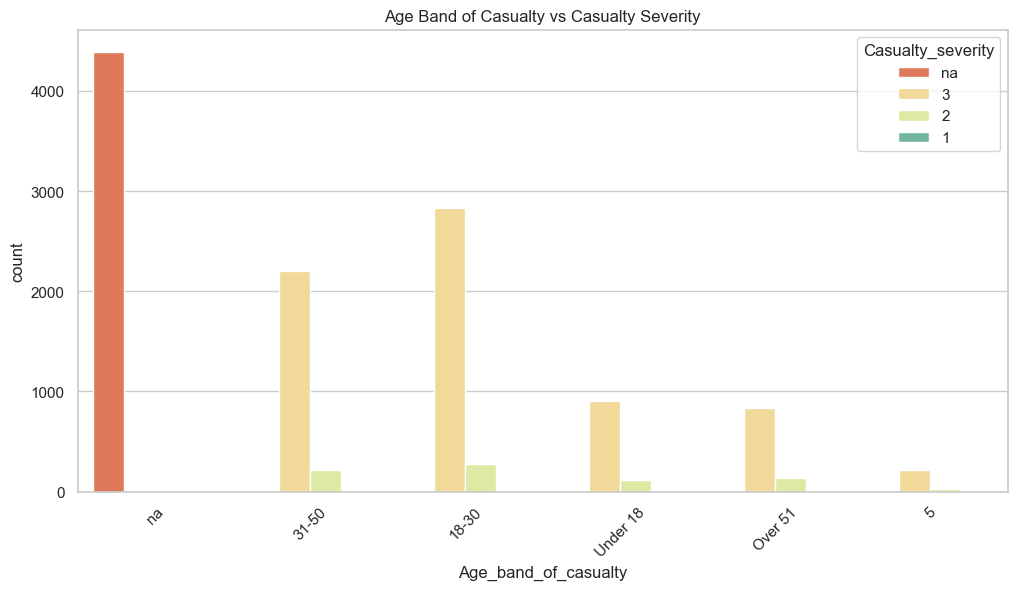

In [255]:
# Relationship between Age_band_of_casualty and Casualty_severity
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_band_of_casualty', hue='Casualty_severity', data=df, palette="Spectral")
plt.title("Age Band of Casualty vs Casualty Severity")
plt.xticks(rotation=45)
plt.show()

### Observations
- The bar chart shows the distribution of casualty severity across different age bands of casualties.  There is a significant decrease in casualties with age, with the lowest number occurring in the "5" age band. Highest causaltity band is between 18-30

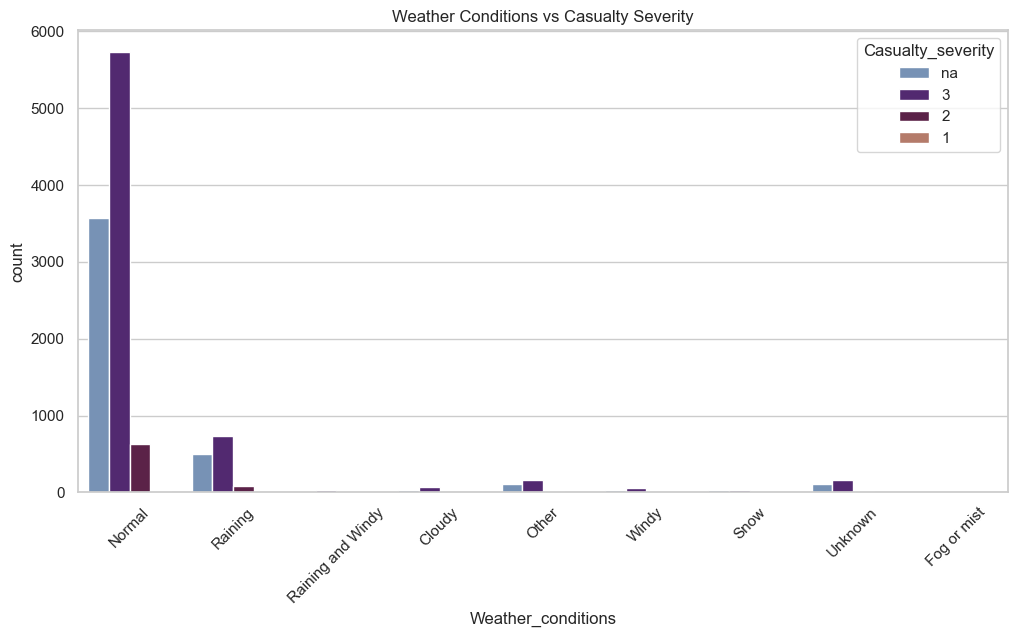

In [256]:
# Weather conditions vs Casualty severity
plt.figure(figsize=(12, 6))
sns.countplot(x='Weather_conditions', hue='Casualty_severity', data=df, palette="twilight")
plt.title("Weather Conditions vs Casualty Severity")
plt.xticks(rotation=45)
plt.show()

### Observations
- The bar chart shows the distribution of casualty severity across different weather conditions. Normal weather conditions have the highest number of accidents. 

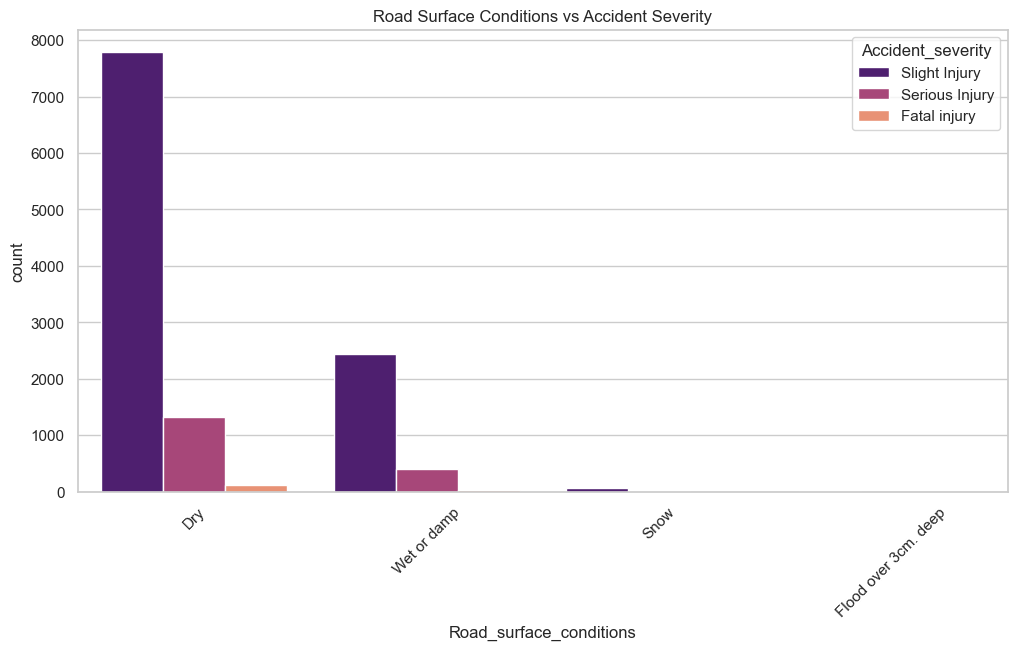

In [257]:
# Relationship between Road_surface_conditions and Accident_severity
plt.figure(figsize=(12, 6))
sns.countplot(x='Road_surface_conditions', hue='Accident_severity', data=df, palette="magma")
plt.title("Road Surface Conditions vs Accident Severity")
plt.xticks(rotation=45)
plt.show()

### Obseravtions

- The bar chart shows the distribution of accident severity across different road surface conditions. Dry roads have the highest number of accidents, with a majority resulting in slight injuries. Snow-covered roads have the lowest number of accidents.


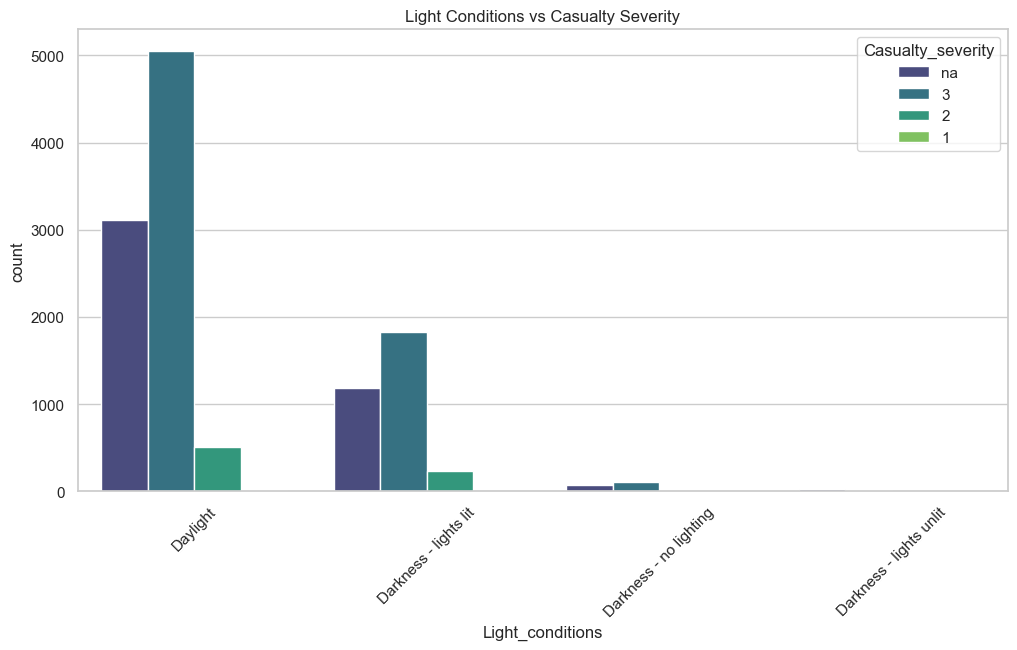

In [258]:
# Explore Light Conditions vs Casualty Severity
plt.figure(figsize=(12, 6))
sns.countplot(x='Light_conditions', hue='Casualty_severity', data=df, palette="viridis")
plt.title("Light Conditions vs Casualty Severity")
plt.xticks(rotation=45)
plt.show()

### Observations

- The bar chart shows the distribution of casualty severity across different light conditions. Daylight has the highest number of accidents. Darkness with no lighting has the highest proportion of fatal accidents. Darkness with lights unlit has the lowest number of accidents.

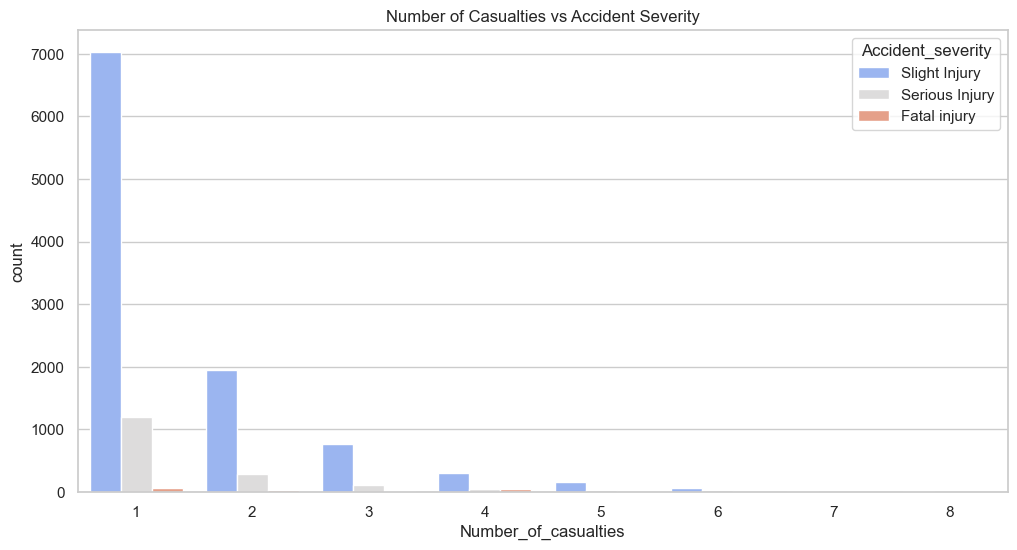

In [261]:
# Number of casualties vs Accident Severity
plt.figure(figsize=(12, 6))
sns.countplot(x='Number_of_casualties', hue='Accident_severity', data=df, palette="coolwarm")
plt.title("Number of Casualties vs Accident Severity")
plt.show()

### Observations
- The bar chart shows the distribution of accident severity across different numbers of casualties. Accidents with one casualty are the most frequent, with a majority resulting in slight injuries. As the number of casualties increases, the proportion of fatal accidents also increases.


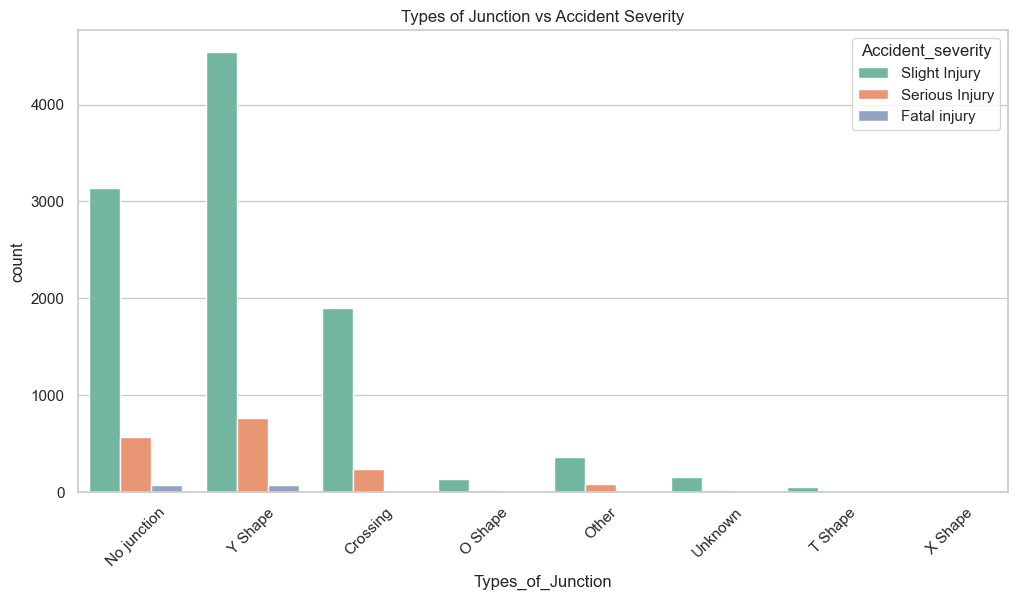

In [262]:
# Types of Junction vs Accident Severity
plt.figure(figsize=(12, 6))
sns.countplot(x='Types_of_Junction', hue='Accident_severity', data=df, palette="Set2")
plt.title("Types of Junction vs Accident Severity")
plt.xticks(rotation=45)
plt.show()

### Observations
- The bar chart shows the distribution of accident severity across different types of junctions. Y Shape has the highest number of accidents, with a majority resulting in slight injuries.


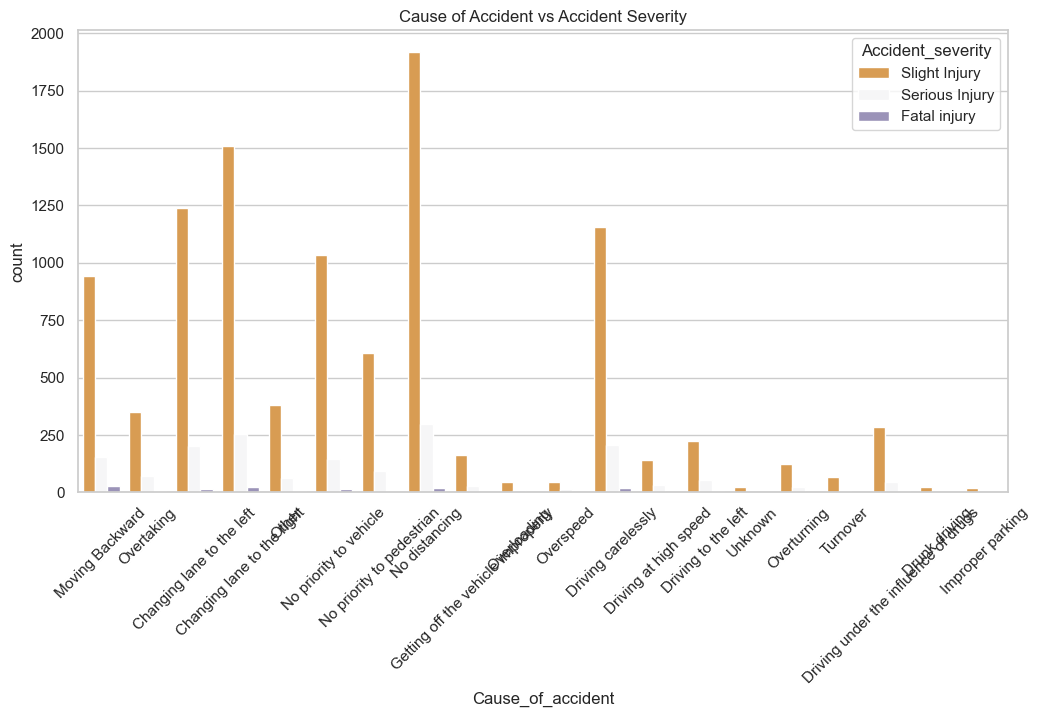

In [264]:
# Accident severity vs Cause of Accident
plt.figure(figsize=(12, 6))
sns.countplot(x='Cause_of_accident', hue='Accident_severity', data=df, palette="PuOr")
plt.title("Cause of Accident vs Accident Severity")
plt.xticks(rotation=45)
plt.show()

### Observations

- The bar chart shows the distribution of accident severity across different causes of accidents. "No priority to pedestrian" has the highest number of accidents, with a majority resulting in slight injuries, followed by  Overspeed and Overtaking .


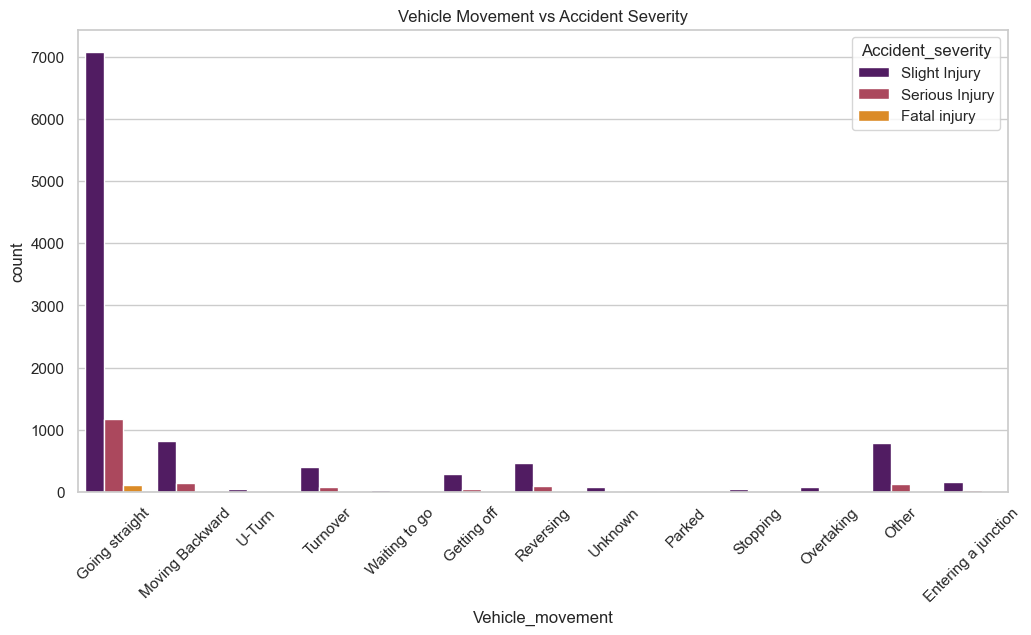

In [266]:
# Vehicle movement vs Accident Severity
plt.figure(figsize=(12, 6))
sns.countplot(x='Vehicle_movement', hue='Accident_severity', data=df, palette="inferno")
plt.title("Vehicle Movement vs Accident Severity")
plt.xticks(rotation=45)
plt.show()


### Observations 
- The bar chart shows the distribution of accident severity across different vehicle movements. Going straight has the highest number of accidents, with a majority resulting in slight injuries. Reversing has the highest proportion of fatal accidents. Parked has the lowest number of accidents.

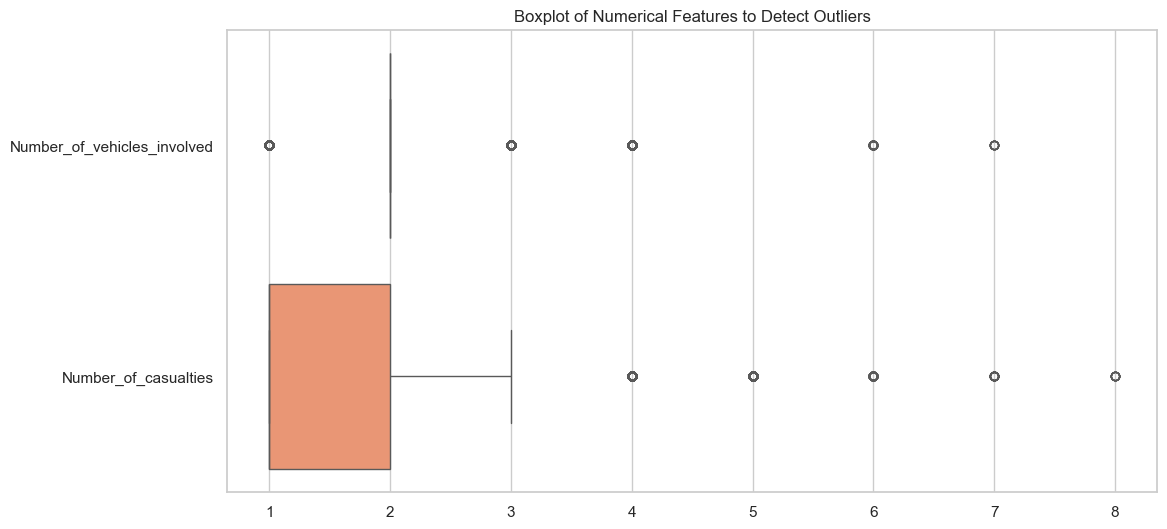

In [268]:
# Boxplot of numerical features to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns], orient="h", palette="Set2")
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.show()


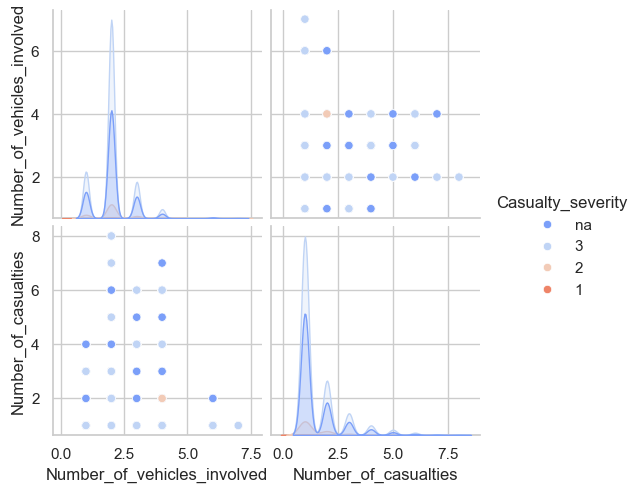

In [270]:
# Pairplot for a few selected numerical columns
selected_columns = ['Number_of_vehicles_involved', 'Number_of_casualties', 'Casualty_severity']
sns.pairplot(df[selected_columns], hue='Casualty_severity', palette='coolwarm')
# plt.title("Pairplot of Selected Numerical Features")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24756\873279778.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')


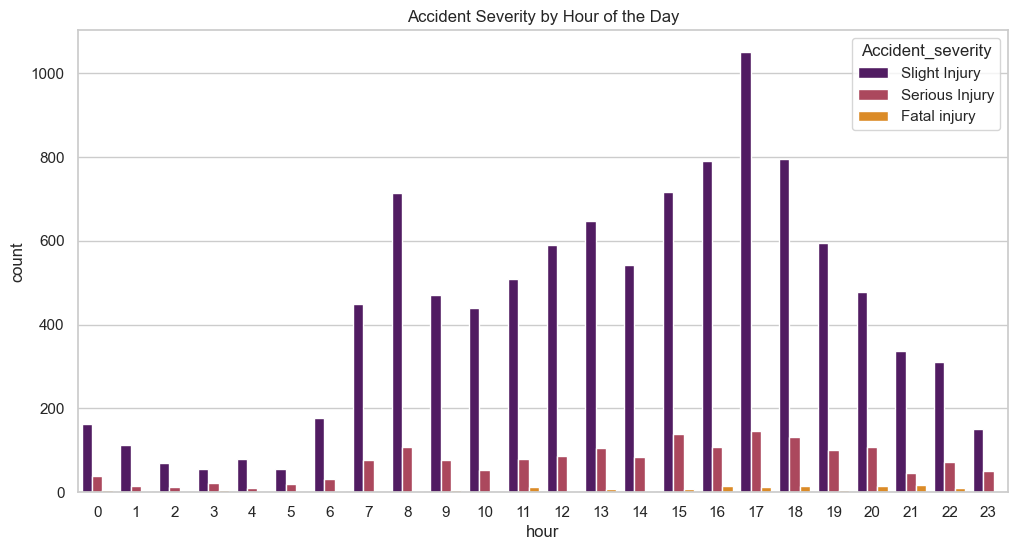

In [271]:
# Explore the relationship between time (if 'Time' column exists) and accident severity
if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
    df['hour'] = df['Time'].dt.hour
    plt.figure(figsize=(12, 6))
    sns.countplot(x='hour', hue='Accident_severity', data=df, palette="inferno")
    plt.title("Accident Severity by Hour of the Day")
    plt.show()

### Obervations
- According to time the highest number of accidents occur at th 17 th hour of the day i.e around 5 pm , the lowest number of accidents is at 3rd hour 3 am in morning


#

#

### Insights and recommendations.. 

#### 1.Vehicles Involved and Casualties:

- The correlation heatmap shows a weak positive relationship between the number of vehicles involved and the number of casualties.
- This suggests that as the number of vehicles increases, there is a slight tendency for the number of casualties to increase.

#### 2.Age Band of Drivers and Casualty Severity:

- The highest number of casualties with severity level 3 (serious injuries) is observed in the 18-30 age group.
- There is a significant decrease in casualties with increasing age, with the lowest number of casualties occurring in the "Over 51" age group.

#### 3.Vehicle Type and Accident Severity:

- Automobiles have the highest number of accidents, with a majority resulting in slight injuries.
- Motorcycles have the highest proportion of fatal accidents, followed by automobiles.
- Public transport vehicles generally have fewer accidents compared to other vehicle types.

#### 4.Weather Conditions and Accident Severity:

- Normal weather conditions (clear weather) have the highest number of accidents, with a majority resulting in slight injuries.
- Fog or mist has the highest proportion of fatal accidents, followed by rainy and windy conditions.
- Snow and windy conditions have the lowest number of accidents.

#### 5.Number of Vehicles Involved and Casualty Severity:

- The highest number of accidents with severity level 3 occurs when 2 vehicles are involved in the accident.
- There is a significant decrease in casualties as the number of vehicles involved increases, with the lowest number of casualties
occurring when 7 or more vehicles are involved.

#### 6.Driving Experience and Accident Severity:

- Drivers with 5-10 years of driving experience have the highest number of accidents, with a majority resulting in slight injuries.
- Drivers with below 1 year of experience have the lowest number of accidents, possibly due to fewer drivers with limited experience in the dataset.

#### 7.Day of Week and Casualty Severity:

- Friday has the highest number of accidents, with a majority resulting in severity level 3 (serious injuries).
- Monday has the lowest number of accidents, and there is a slight decrease in casualties towards the end of the week.

#### 8.Gender of Drivers and Accident Severity:

- Male drivers have the highest number of accidents, with a majority resulting in slight injuries.
- Female drivers have the lowest number of accidents, while unknown sex categories have the highest proportion of fatal accidents.

#### 9.Educational Level and Driving Experience:

- Junior high school education level drivers have the highest number of drivers with 5-10 years of experience.
- There are very few illiterate drivers in the dataset, highlighting the importance of education in driving practices.

#### 10.Age Band of Casualties and Casualty Severity:

- 18-30 age band shows the highest number of casualties, with a significant decrease in casualties as age increases. The lowest number
of casualties occurs in the "5" age band.

#### 11.Weather Conditions and Casualty Severity:

- Normal weather conditions continue to show the highest number of accidents, with a majority resulting in slight injuries.

#### 12.Road Surface Conditions and Accident Severity:

- Dry roads have the highest number of accidents, with a majority resulting in slight injuries.
- Snow-covered roads have the lowest number of accidents.

#### 13.Light Conditions and Casualty Severity:

- Daylight has the highest number of accidents, while darkness with no lighting has the highest proportion of fatal accidents.
- Darkness with unlit lights has the lowest number of accidents.

#### 14.Number of Casualties and Accident Severity:

- Accidents with one casualty are the most frequent, with a majority resulting in slight injuries. As the number of casualties increases, 
the proportion of fatal accidents also increases.

#### 15.Junction Types and Accident Severity:

- The Y-shape junctions have the highest number of accidents, with a majority resulting in slight injuries.

#### 16. Causes of Accidents and Accident Severity:

- The highest number of accidents is due to "No priority to pedestrian," followed by Overspeed and Overtaking. Most of these accidents 
result in slight injuries.

#### 17.Vehicle Movements and Accident Severity:

- Going straight has the highest number of accidents, with a majority resulting in slight injuries.
- Reversing has the highest proportion of fatal accidents.
- Parked vehicles have the lowest number of accidents.

#### 18.Accident Time and Frequency:

- The highest number of accidents occurs at 17:00 (5 PM), while the lowest number occurs at 03:00 (3 AM) in the morning.


#

#

### Recommendations

#### 1.Driver Education and Training:

- Focus on increasing road safety awareness for younger drivers, particularly those in the 18-30 age group, as they are involved in a significant number of accidents.
- Consider targeted educational campaigns for drivers with less than 1 year of experience to reduce accidents caused by inexperience.
Safety Measures for Motorcycles:
- Since motorcycles have the highest proportion of fatal accidents, it is important to implement safety measures, such as mandatory helmet laws and better protective gear for motorcycle riders.

#### 2.Road and Weather-Related Improvements:

- While normal weather conditions account for a large number of accidents, more weather-adaptive infrastructure could help, such as better fog and mist warnings, especially on roads prone to low visibility.
- For snow-covered roads, improving road salting and clearance systems could reduce accidents.

#### 3.Policy Focus on Friday Accidents:

- With Fridays having the highest number of accidents, authorities should focus on enhanced traffic management and safety enforcement on this day, particularly during peak hours like 5 PM.

#### 4.Addressing Junction and Road Layouts:

- Given that Y-shape junctions have the highest number of accidents, it might be beneficial to revisit the design of these intersections, ensuring that traffic flow is optimized and accidents are minimized.

#### 5.Improving Road Lighting:

- As darkness with no lighting correlates with fatal accidents, installing more streetlights and proper road lighting could help reduce accident severity, especially at night.

#### 5.Pedestrian Safety and Priority:

- The high number of accidents related to "No priority to pedestrian" highlights the need for pedestrian-focused road safety policies, including crosswalks, signals, and better signage to improve safety for pedestrians.

#### 6.Improved Vehicle Movement Monitoring:

- Focus on monitoring and controlling reversing vehicles, as this movement shows a higher proportion of fatal accidents.

#### 7.Data-Driven Policy Implementation:

- The findings should help policymakers create data-driven strategies for traffic control, safety regulations, and vehicle inspections, which can be tailored to reduce the most frequent causes of accidents identified in the analysis.


By implementing these recommendations, authorities can work towards reducing accident frequency and severity, thus improving road safety for all road users.